In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\PURVA\Desktop\imdb.xlsx")
data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data.shape

(15509, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(5659, 10)

In [8]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [9]:
data.duplicated().sum()

0

#    Data Preprocessing

In [10]:
import re

In [11]:
data["Name"] = data['Name'].str.replace(r'^[^a-zA-Z]*', '').str.strip()

C:\Users\PURVA\AppData\Local\Temp\ipykernel_8280\965218217.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Name"] = data['Name'].str.replace(r'^[^a-zA-Z]*', '').str.strip()


In [12]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.replace(r'[-.]','').str[:4]

C:\Users\PURVA\AppData\Local\Temp\ipykernel_8280\535306105.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Year'] = data['Year'].str.replace(r'[-.]','').str[:4]


In [14]:
data.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
data['Duration'] = data['Duration'].str.replace(r'min','').str.strip()
data.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [16]:
genre_columns = data['Genre'].str.split(', ',expand=True)

In [17]:
genre_columns = genre_columns.rename(columns={
    0: 'Genre_1',
    1: 'Genre_2',
    2: 'Genre_3',
    
})

In [18]:
for col in genre_columns.columns:
     genre_columns[col].fillna(genre_columns[col].mode()[0], inplace=True)

In [19]:
data = pd.concat([data,genre_columns],axis=1)
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
1,Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Drama,Drama
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Drama
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


# Data visualisation  

In [20]:
pip install matplotlib

In [21]:
import matplotlib.pyplot as plt

In [22]:
genre_counts = data.filter(like='Genre_').stack().value_counts()
print(genre_counts)

Drama          8794
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
dtype: int64


In [23]:
top_5_genres = genre_counts.sort_values(ascending=False).head(5)
top_5_genres

Drama      8794
Action     1686
Romance    1380
Comedy     1344
Crime       875
dtype: int64

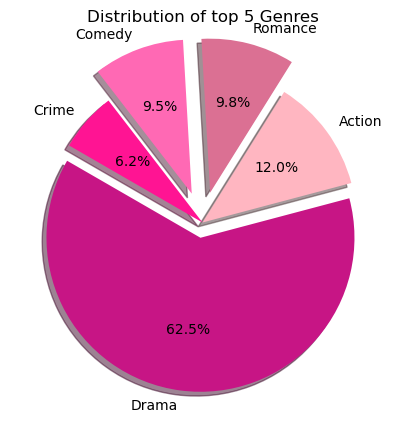

In [24]:
explode = [0.1, 0.0, 0.2, 0.2, 0.0]
colors = [ "mediumvioletred", "lightpink", "palevioletred",
          "hotpink", "deeppink"]
plt.figure(figsize=(5, 5))
plt.pie(top_5_genres,explode=explode ,labels=top_5_genres.index,shadow=True,colors=colors ,autopct='%1.1f%%', startangle=150)
plt.title('Distribution of top 5 Genres')
plt.show()

In [26]:
newdata = data.sort_values(by='Rating',ascending=False)
newdata.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,Drama,Romance,Drama
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani,Music,Romance,Drama
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi,Drama,Drama,Drama
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha,Drama,Drama,Drama
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar,History,Romance,Drama


In [32]:
director_rating = newdata.groupby('Director')['Rating'].mean().reset_index()
director_rating = director_rating.sort_values(by='Rating',ascending=False)
director_rating

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
...,...,...
1287,Navin Batra,1.9
1504,Raajeev Walia,1.8
2109,Stanley D'Costa,1.8
1427,Pramod Mandloi,1.7


In [34]:
top_director = director_rating.head(10)
top_director

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
2309,Venkatesh Bk,9.3
1921,Sapna Bhavnani,9.3
2387,Vishwa Bhanu,9.3
1528,Rahul Mallick,9.3
635,Gautam Joshi,9.3


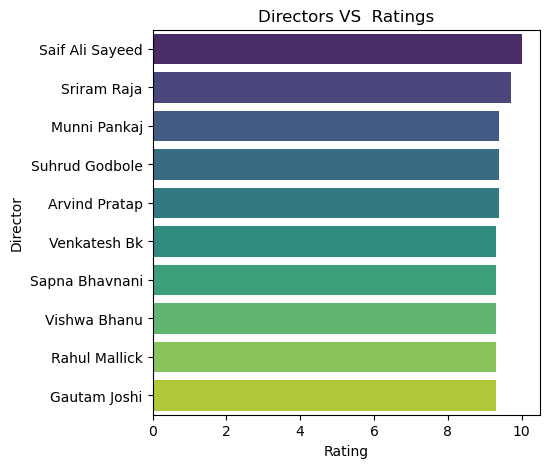

In [46]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.barplot(data=top_director,x="Rating",y='Director',palette="viridis")
plt.title("Directors VS  Ratings")
plt.show()

In [48]:
actorcount = data['Actor 1'].value_counts().reset_index() 
actorcount

,index,Actor 1
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
...,...,...
1955,Murad Ali,1
1956,Amarjeet,1
1957,Rinku Jaiswal,1
1958,Usha Kiran,1


In [50]:
actorcount.columns = ['Actor','Movie count']
top_10_actors = actorcount.head(10)
top_10_actors

,Actor,Movie count
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


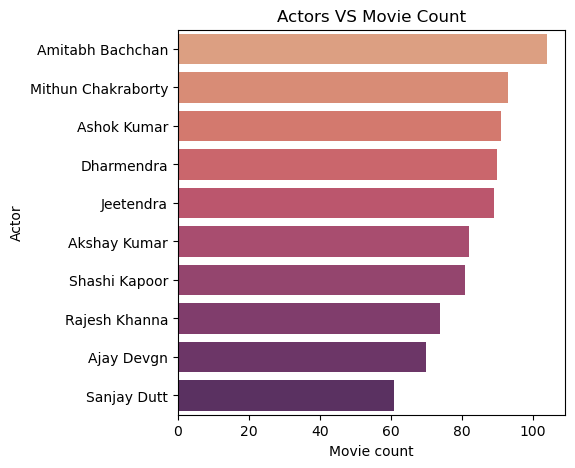

In [53]:
plt.figure(figsize=(5,5))
sns.barplot(data=top_10_actors,y="Actor",x='Movie count',palette="flare")
plt.title("Actors VS Movie Count")
plt.show()

In [54]:
yearly_movie_count = data['Year'].value_counts().reset_index()
yearly_movie_count.columns = ['Year','Movie count']
yearly_movie_count = yearly_movie_count.sort_values(by='Year')

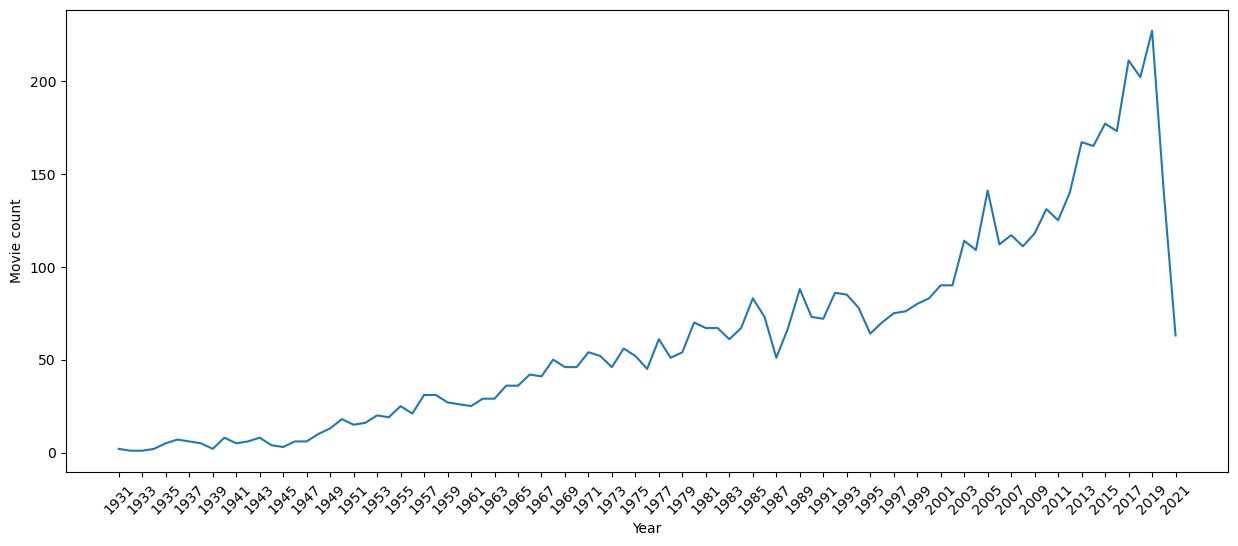

In [60]:
plt.figure(figsize=(15,6))
sns.lineplot(data=yearly_movie_count,y='Movie count',x='Year')
plt.xticks(ticks=yearly_movie_count['Year'][::2], rotation=45)
plt.show()


# Machine Learning Model  

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [114]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
1,1662,2019,109,229,7.0,8,629,1352,2272,319,Drama,Drama,Drama
3,5233,2019,110,184,4.4,35,1335,1198,719,2148,Comedy,Romance,Drama
5,459,1997,147,157,4.7,827,1530,378,75,2045,Comedy,Drama,Musical
6,5239,2005,142,289,7.4,1086,2044,692,1112,2524,Drama,Romance,War
8,14,2012,82,320,5.6,326,135,1934,1175,1013,Horror,Mystery,Thriller


In [115]:
X = data[['Year','Duration','Genre','Votes','Director','Actor 1','Actor 2','Actor 3']]
X.shape

(5659, 8)

In [116]:
Y = data['Rating']
Y.shape

(5659,)

In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size =0.2,random_state=42)


In [118]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Name'] = label_encoder.fit_transform(data['Name'])
data['Director'] = label_encoder.fit_transform(data['Director'])
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Actor 1'] = label_encoder.fit_transform(data['Actor 1'])
data['Actor 2'] = label_encoder.fit_transform(data['Actor 2'])
data['Actor 3'] = label_encoder.fit_transform(data['Actor 3'])

In [130]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
1,1662,2019,109,229,7.0,8,629,1352,2272,319,Drama,Drama,Drama
3,5233,2019,110,184,4.4,35,1335,1198,719,2148,Comedy,Romance,Drama
5,459,1997,147,157,4.7,827,1530,378,75,2045,Comedy,Drama,Musical
6,5239,2005,142,289,7.4,1086,2044,692,1112,2524,Drama,Romance,War
8,14,2012,82,320,5.6,326,135,1934,1175,1013,Horror,Mystery,Thriller


In [119]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [120]:
xtest = np.array(xtest)
xtest

array([['1990', '159', 38, ..., 406, 792, 1721],
       ['2014', '93', 229, ..., 1317, 2028, 738],
       ['1992', '132', 229, ..., 412, 1310, 660],
       ...,
       ['1998', '154', 47, ..., 1294, 726, 1909],
       ['1999', '179', 277, ..., 115, 176, 88],
       ['1971', '100', 229, ..., 1113, 1207, 1349]], dtype=object)

In [121]:
ypred = model.predict(xtest)
ypred

C:\Users\PURVA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.63033377, 5.84119076, 5.93058305, ..., 5.60661345, 5.62132497,
       6.54181763])

In [122]:
ypred

array([5.63033377, 5.84119076, 5.93058305, ..., 5.60661345, 5.62132497,
       6.54181763])

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('MAE:',mae)
print('MSE:',mse)
print('R2:',r2)

MAE: 1.0495625054893822
MSE: 1.686400436542858
R2: 0.08929055052181245


In [132]:
#making new predictions
newdata = pd.DataFrame({
    'Year': [1],
    'Duration': [0],
    'Genre': [1],
    'Votes': [1],
    'Director': [1],
    'Actor 1': [1],
    'Actor 2': [1],
    'Actor 3': [1]
})

In [136]:
ytest

array([6. , 2.4, 3.8, ..., 4.8, 6.7, 6.6])

In [133]:
newdata

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,0,1,1,1,1,1,1
